# agglomerative clustering : 
    
        - it is unsupervised model and a type of hierarchical clustering. it clusters the data based on  **euclidian distance**.  

        - finding optimal number of clusters:
                using dendrogram

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import StratifiedShuffleSplit

from scipy.cluster.hierarchy import linkage, dendrogram #dnedrogram - to determine optimal number of clusters.
from sklearn.cluster import AgglomerativeClustering #for clustering

from sklearn.metrics import silhouette_score #using silhouette score to measure the consistency/goodness of the clusters

In [2]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


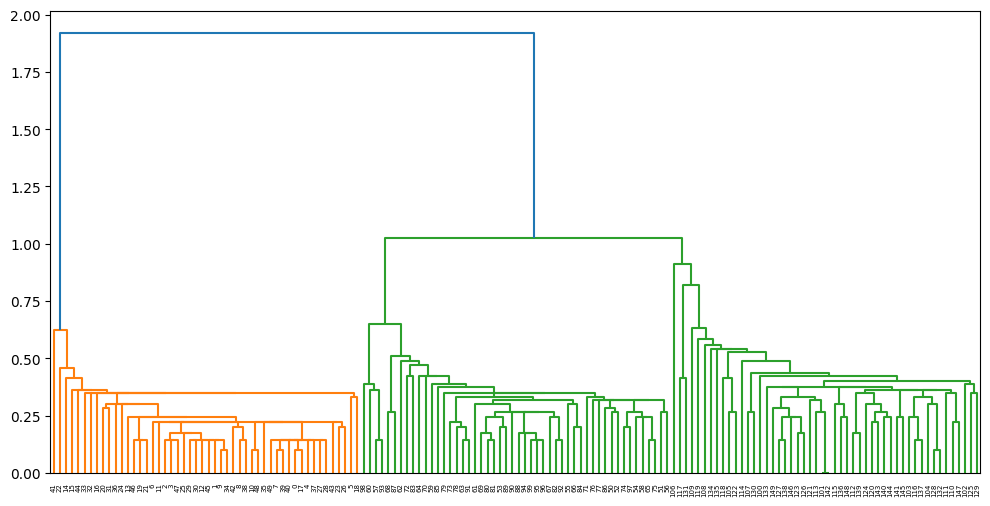

In [3]:
# plotting dendrogram to find optimal number of clusters

plt.subplots(figsize = (12, 6))
d = dendrogram(linkage(df, method = 'single'), labels=df.index)
plt.xticks(rotation = 90)
plt.show()

by analysing the above dendrogram, we can find that the optimal number of clusters will be 3.

In [4]:
ac = AgglomerativeClustering(n_clusters=3, linkage='single')

y_pred = ac.fit_predict(df)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
df['predictions']= y_pred

#### using silhouette score to find the best number of clusters for agglomerative clustering

In [6]:
silhouette_avg = []

for i in range(2, 21):
    ac = AgglomerativeClustering(n_clusters=i, linkage='single')
    pred = ac.fit_predict(df.drop(columns = ['target', 'predictions']))
    silhouette_avg.append(silhouette_score(df.drop(columns = ['target', 'predictions']), pred))

silhouette_avg

[0.6867350732769777,
 0.5121107753649307,
 0.28193919132003853,
 0.2838119645524374,
 0.22144270332813407,
 0.13276311217217873,
 0.0587028514537829,
 0.02243027834875979,
 0.02514780977220397,
 0.0649239242325394,
 0.02147625040066721,
 0.009476356852604131,
 -0.009772054869513009,
 -0.10454750670050565,
 -0.08512020436441632,
 -0.08624594917805575,
 -0.08883309943165213,
 -0.09921243921780952,
 0.004674097201627715]

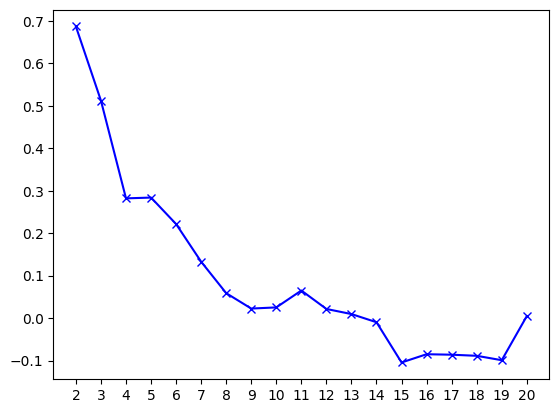

In [20]:
plt.plot(range(2, 21), silhouette_avg, 'bx-')
plt.xticks(range(2, 21))
plt.show()

greater the silhouette score, better the model

## plotting the predictions

In [61]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561,-0.322522
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658,-0.191714
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035,-0.299793
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547,-0.376170
target,0.782561,-0.426658,0.949035,0.956547,1.000000,-0.500000
predictions,-0.322522,-0.191714,-0.299793,-0.376170,-0.500000,1.000000


we will use 'petal length (cm)' and 'petal width (cm)' to plot the scatterplot as it has higher correlation with the target feature.

NOTE : in unsupervised models like this, we will not have target feature so in that case you may take any two features or highly correlated features to plot the scatter plot or maybe you can correlate the perdictions with features and select two features that are highly correlated with the predicted values.

KEEP IN MIND THAT THIS IS SELF MADE THOUGHT, SO THIS IS NOT A RULE. YOU MAY TRY A DIFFERENT METHOD.

In [34]:
df_num[y_pred == 0, 2] #returns all the values where the model 

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

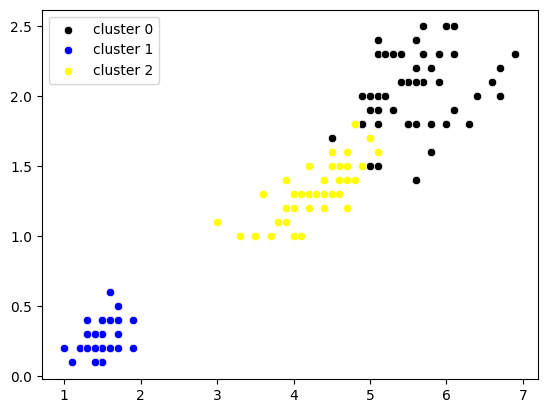

In [7]:
# method 1

sns.scatterplot(x = df['petal length (cm)'][df['predictions'] == 0].values, y = df['petal width (cm)'][df['predictions'] == 0].values, color= 'black', label = 'cluster 0')
sns.scatterplot(x = df['petal length (cm)'][df['predictions'] == 1].values, y = df['petal width (cm)'][df['predictions'] == 1].values, color= 'blue', label = 'cluster 1')
sns.scatterplot(x = df['petal length (cm)'][df['predictions'] == 2].values, y = df['petal width (cm)'][df['predictions'] == 2].values, color= 'yellow', label = 'cluster 2')
plt.legend()
plt.show()

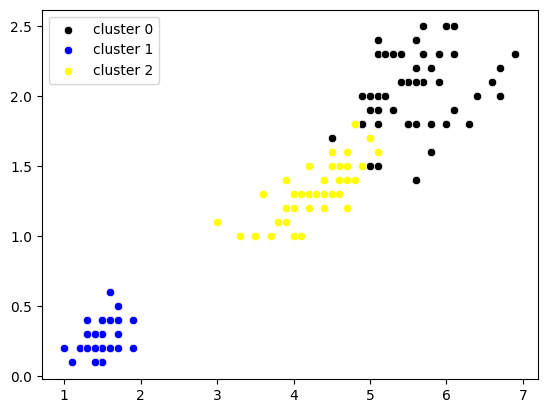

In [10]:
# method 2 - here we will use

_df = np.array(df.drop(columns = ['target', 'predictions']))

# _df[y_pred == cluster_number, column_index] -> returns values where the model has predicted the cluster_number from column column_index
# eg : _df[y_pred == 0, 1] -> returns all the values from column 2 where the model has predicted 0 as their cluster.

sns.scatterplot(x = _df[y_pred == 0, 2], y = _df[y_pred == 0, 3], color= 'black', label = 'cluster 0')
sns.scatterplot(x = _df[y_pred == 1, 2], y = _df[y_pred == 1, 3], color= 'blue', label = 'cluster 1')
sns.scatterplot(x = _df[y_pred == 2, 2], y = _df[y_pred == 2, 3], color= 'yellow', label = 'cluster 2')
plt.legend()
plt.show()